# Project Outline: Unsupervised Learning
This notebook is the unsupervised learning portion of the project "To Everything There is a Season : Using Weather Data and Demographic Information in the Predictive Modeling of Crimes in Dallas, Texas" by Ashley Steele.

[1. Importing Libraries and Setting Preferences](#1.-Importing-Libraries-and-Setting-Preferences)

[2. Cleaning and Setting Up Data for Clustering- Attempt One](#2.-Cleaning-and-Setting-Up-Data-for-Clustering--Attempt-One)

[3. Clustering Our Raw Data!](#3.-Clustering-Our-Raw-Data!)
- [3.1: Clustering in Our New DF!](#3.1:-Clustering-in-Our-New-DF!)
- [3.2: Clustering Our Time Series "Kept" Variables](#3.2:-Clustering-Our-Time-Series-"Kept"-Variables)

[4. Final Thoughts on Clustering in This Project](#4.-Final-Thoughts-on-Clustering-in-This-Project)

## 1. Importing Libraries and Setting Preferences 
[Return to Outline](#Project-Outline:-Unsupervised-Learning)

In this portion of the project we are going to see if we can determine any bivariate relationships using clustering.

In [146]:
# Standard library and package importing-- nothing to see here! Move along!
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import os
%matplotlib inline

In [147]:
# Importing our datetime information!
from datetime import datetime
from dateutil.parser import parse

In [148]:
# Setting preferences for notebook
pd.set_option('precision', 2)
pd.set_option('display.max_columns', None)

In [149]:
# Setting up plotting preferences
sns.set(style= 'whitegrid', font_scale = 1.5)

sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.set(palette = 'bright')

In [150]:
# Importing our data to use
df = pd.read_csv('complete.csv')

In [151]:
# Checking what our data looks like after import
df.head()

,Unnamed: 0,date_only,month,mnth_yr,day1_of_the_week,time_of_occurrence,day_of_the_year,temp_in_F,humidity,percip_inches,911_call_type,type_of_incident,division,sector,council_district,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,x_coordinate,y_cordinate,zip_code,total_pop,male,%_male,female,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty,year,zip_code.1
0,0,2015-01-01,1,January-2015,Thu,17:00,1,34.35,89.47,0.03,11V - BURG MOTOR VEH,BMV,SOUTH CENTRAL,730.0,D8,Individual,White,Non-Hispanic or Latino,Male,50,8173,"JONES,REGINALD,LADUNNE",NaN,NaN,2.51e+06,6.93e+06,75241,50872.0,23984.0,45.6,26888.0,54.4,34.0,71.8,68.1,14.1,12.0,21.1,74.7,11.5,0.0,20.3,3777.1,3777.1,48.9,6.3,42029.6,27.8,30.6,2015,75241
1,1,2015-01-01,1,January-2015,Thu,00:20,1,34.35,89.47,0.03,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,SOUTH CENTRAL,710.0,D4,Individual,Black,Non-Hispanic or Latino,Male,51,8133,"ADAMS,CORY,JAMES",NaN,NaN,2.49e+06,6.95e+06,75216,76015.0,35922.0,46.6,40093.0,53.4,35.2,71.9,67.9,16.3,13.4,29.9,65.0,3.1,0.1,32.8,3142.2,3142.2,45.7,6.6,35651.2,34.2,38.6,2015,75216
2,2,2015-01-01,1,January-2015,Thu,08:00,1,34.35,89.47,0.03,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,CENTRAL,150.0,D2,Individual,Black,Non-Hispanic or Latino,Female,64,7341,"FREEMAN,DIANA,J",NaN,NaN,2.49e+06,6.97e+06,75215,22570.0,11298.0,48.8,11272.0,51.2,38.8,79.2,76.1,16.2,12.8,22.7,73.6,3.1,0.7,17.0,2085.6,2085.6,44.9,6.5,36629.8,30.3,37.2,2015,75215
3,3,2015-01-01,1,January-2015,Thu,02:00,1,34.35,89.47,0.03,40 - OTHER,ASSAULT -VERBAL THREAT,NORTHWEST,520.0,D6,Individual,Hispanic or Latino,Hispanic or Latino,Male,36,10767,"HOVIS,ALAN",5455,"AKON,FREDRICK,CHARLES",2.47e+06,7.00e+06,75220,69009.0,38379.0,53.0,30630.0,47.0,33.7,74.9,71.2,12.0,9.1,75.7,7.3,16.0,3.0,48.1,4477.7,4477.7,62.7,4.8,104542.2,17.9,19.8,2015,75220
4,4,2015-01-01,1,January-2015,Thu,13:00,1,34.35,89.47,0.03,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,NORTHEAST,220.0,D9,Individual,Black,Non-Hispanic or Latino,Female,70,9654,"BANDAS,WAYI,ALIBEY",NaN,NaN,2.53e+06,6.99e+06,75228,106467.0,52189.0,49.1,54278.0,50.9,31.8,70.2,66.2,11.5,9.0,49.3,23.6,13.2,1.9,49.0,3865.9,3865.9,60.6,7.0,51758.2,22.6,24.5,2015,75228


In [152]:
# What columns does our dataset have?
df.columns

Index(['Unnamed: 0', 'date_only', 'month', 'mnth_yr', 'day1_of_the_week',
       'time_of_occurrence', 'day_of_the_year', 'temp_in_F', 'humidity',
       'percip_inches', '911_call_type', 'type_of_incident', 'division',
       'sector', 'council_district', 'victim_type', 'victim_race',
       'victim_ethnicity', 'victim_gender', 'victim_age',
       'responding_officer_#1__badge_no', 'responding_officer_#1__name',
       'responding_officer_#2_badge_no', 'responding_officer_#2__name',
       'x_coordinate', 'y_cordinate', 'zip_code', 'total_pop', 'male',
       '%_male', 'female', '%_female', 'median_age', '18_&_over', '21_&_over',
       '62_&_over', '65_&_over', '%_white', '%_black', '%_native', '%_asian',
       '%_hispanic', 'pop_over_16', '%_pop_over_16', '%_employed',
       '%_unemployed', 'mean_household_income', '%_families_poverty',
       '%_all_people_poverty', 'year', 'zip_code.1'],
      dtype='object')

In [153]:
# Getting rid of columns that are extra or obvious errors
df.drop(columns = ['Unnamed: 0', 'zip_code.1' ], inplace = True)

## 2. Cleaning and Setting Up Data for Clustering- Attempt One
[Return to Outline](#Project-Outline:-Unsupervised-Learning)

In [154]:
# What does this dataset look like, overall?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254724 entries, 0 to 254723
Data columns (total 49 columns):
date_only                          254724 non-null object
month                              254724 non-null int64
mnth_yr                            254724 non-null object
day1_of_the_week                   254724 non-null object
time_of_occurrence                 254724 non-null object
day_of_the_year                    254724 non-null int64
temp_in_F                          254724 non-null float64
humidity                           254724 non-null float64
percip_inches                      254724 non-null float64
911_call_type                      254724 non-null object
type_of_incident                   254724 non-null object
division                           254713 non-null object
sector                             254713 non-null float64
council_district                   254578 non-null object
victim_type                        254724 non-null object
victim_race      

In [155]:
# Do we have any null values?
df.isnull().sum().sort_values(ascending= False)

responding_officer_#2__name        169593
responding_officer_#2_badge_no     169593
council_district                      146
sector                                 11
division                               11
time_of_occurrence                      0
victim_type                             0
month                                   0
responding_officer_#1__name             0
responding_officer_#1__badge_no         0
victim_age                              0
victim_gender                           0
victim_ethnicity                        0
victim_race                             0
mnth_yr                                 0
day_of_the_year                         0
day1_of_the_week                        0
x_coordinate                            0
type_of_incident                        0
911_call_type                           0
percip_inches                           0
humidity                                0
temp_in_F                               0
year                              

We expected to see null values in the areas above, so we are good to keep going! YAY!

Since we are focusing on clustering our data in the easiest manner possible let's create a sub-dataframe to do univariate clustering on our data set! Clustering works best on chunks of data that are continuous varibles, such as age, date, temperature, etc.

Even though our main focus in this project is on mainly supervised learning (we have labeled data and want to use that data to make predictions) let's see if we can isolate our continuous variables and attempt to cluster them!

In [156]:
# Keeping only columns that have continuous data
new_df = df[['date_only', 'temp_in_F', 'victim_age', 'total_pop', 'mean_household_income']].copy()

In [157]:
# Double checking layout of new df
new_df.head()

,date_only,temp_in_F,victim_age,total_pop,mean_household_income
0,2015-01-01,34.35,50,50872.0,42029.6
1,2015-01-01,34.35,51,76015.0,35651.2
2,2015-01-01,34.35,64,22570.0,36629.8
3,2015-01-01,34.35,36,69009.0,104542.2
4,2015-01-01,34.35,70,106467.0,51758.2


In [158]:
# Date only is currently a string. We need to convert it to a unique number
new_df['date_only'] = new_df['date_only'].str.replace('-', '')
new_df['date_only'] = pd.to_numeric(new_df['date_only'])

In [159]:
# What does our new data frame look like?
new_df.head()

,date_only,temp_in_F,victim_age,total_pop,mean_household_income
0,20150101,34.35,50,50872.0,42029.6
1,20150101,34.35,51,76015.0,35651.2
2,20150101,34.35,64,22570.0,36629.8
3,20150101,34.35,36,69009.0,104542.2
4,20150101,34.35,70,106467.0,51758.2


Now that we have a new dataframe with numerical only info let's see if we can cluster it, somehow!

## 3. Clustering Our Raw Data!
[Return to Outline](#Project-Outline:-Unsupervised-Learning)

### 3.1: Clustering in Our New DF!
[Return to Outline](#Project-Outline:-Unsupervised-Learning)

Since unsupervised learning is a requirement for this project let's start off by setting up a K-Means model for the entire dataset, followed by attempting to cluster individual features against each other to see if some sort of pattern emerges!

**Note:** since our data does not lend itself well to clustering in the first part of this section we will look at both of the features we selected for the graph in both the X and Y positions to see if we can gain a bit more information about their relationships to each other.

In [160]:
# Setting up our kmeans model for clustering (on entire dataset)
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(new_df)

In [161]:
# Getting cluster centroids
print('The centers of our clusters are: ', kmeans.cluster_centers_)

# Getting cluster labels
print('The labels of our clusters are: ', kmeans.labels_)

The centers of our clusters are:  [[2.01605478e+07 6.92713291e+01 3.97983066e+01 8.86023264e+04
  5.20590768e+04]
 [2.01760633e+07 6.89247026e+01 3.91161126e+01 8.21699818e+04
  1.18661174e+05]
 [2.01704462e+07 6.90601659e+01 4.16045271e+01 3.57069461e+04
  1.78024406e+05]
 [2.01684094e+07 6.92754883e+01 3.90980142e+01 3.69052986e+04
  1.09670329e+05]
 [2.01601732e+07 6.94245725e+01 4.07521200e+01 3.40445453e+04
  5.14778392e+04]]
The labels of our clusters are:  [4 0 4 ... 3 2 3]


In [162]:
# Setting the index of our new df to the date
new_df.set_index('date_only', inplace = True)

In [163]:
# Sanity check: did our index actually reset?
new_df.head()

,temp_in_F,victim_age,total_pop,mean_household_income
date_only,,,,
20150101,34.35,50,50872.0,42029.6
20150101,34.35,51,76015.0,35651.2
20150101,34.35,64,22570.0,36629.8
20150101,34.35,36,69009.0,104542.2
20150101,34.35,70,106467.0,51758.2


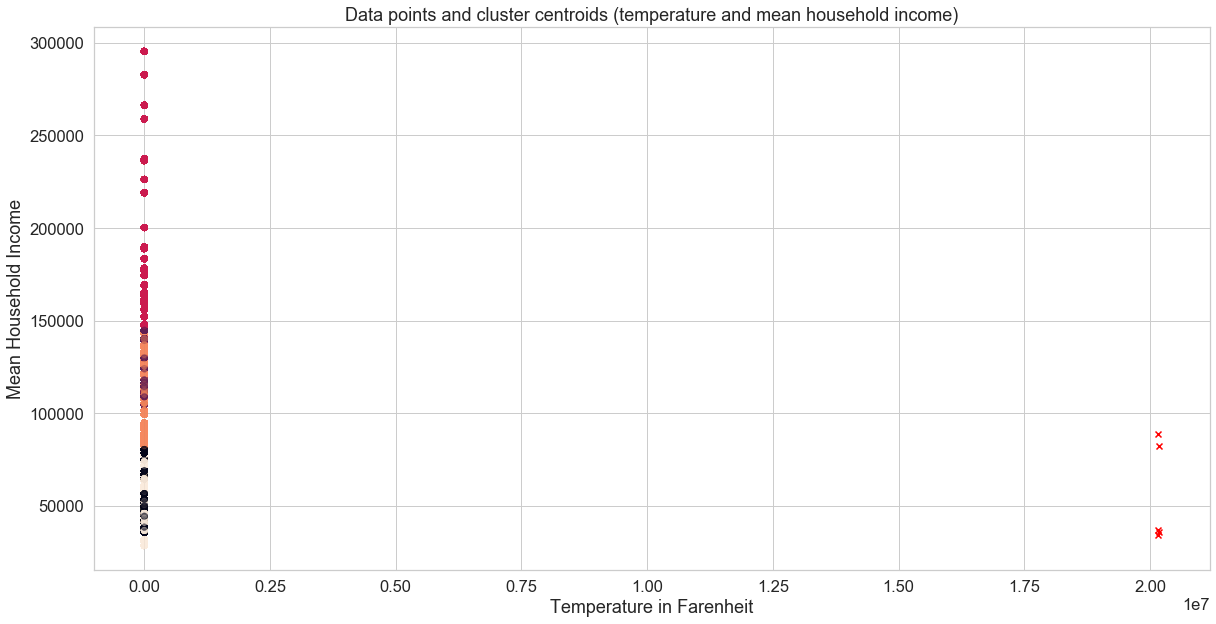

In [164]:
# Plotting cluster centers and the data points on a 2d plane (looking at temperature and mean household income)
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 0], new_df.iloc[:, 3], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 3],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Mean Household Income');

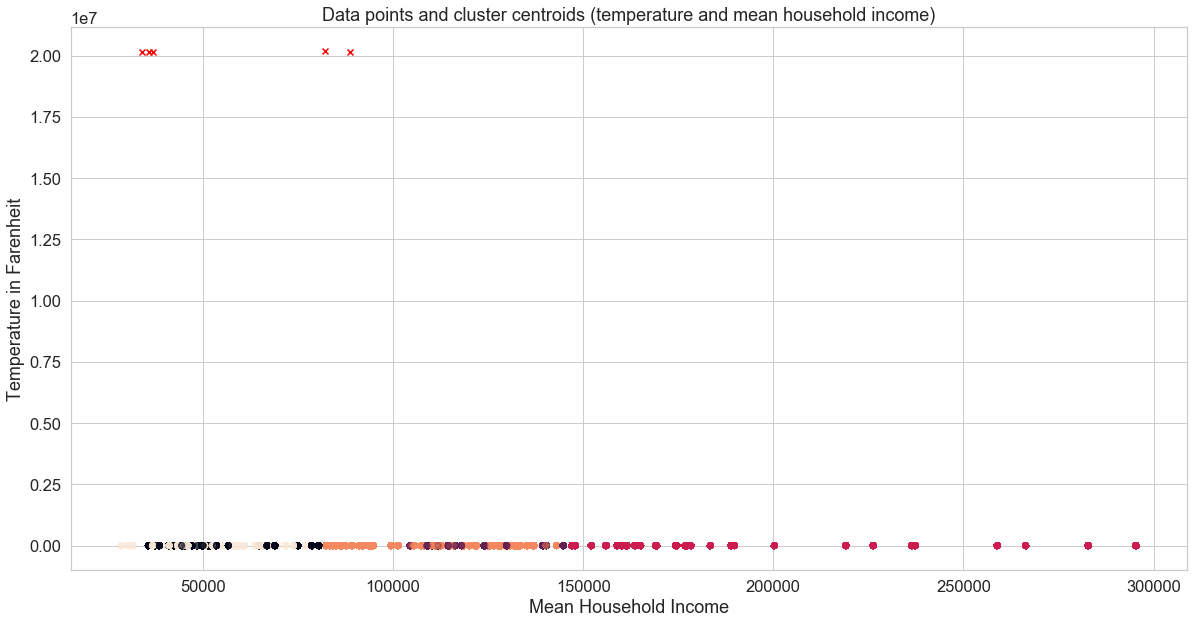

In [165]:
# Plotting the reverse of the plot above
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 3], new_df.iloc[:, 0], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 3],kmeans.cluster_centers_[:, 0],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.ylabel('Temperature in Farenheit')
plt.xlabel('Mean Household Income');

**Takeaways:**

Unfortunately, since this data is in a compressed, straight line we really can't gain much insight from this clustering. Let's move on to the next set of features.


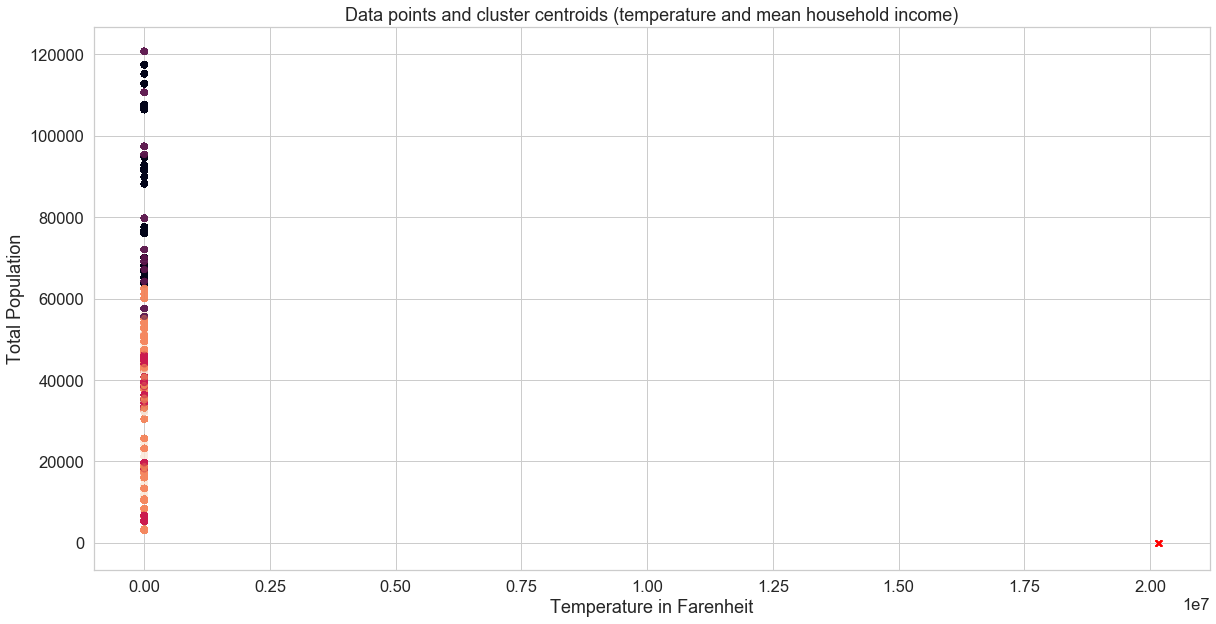

In [166]:
# Plotting cluster centers and the data points on a 2d plane (looking at temperature and total population)
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 0], new_df.iloc[:, 2], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 2],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Total Population');

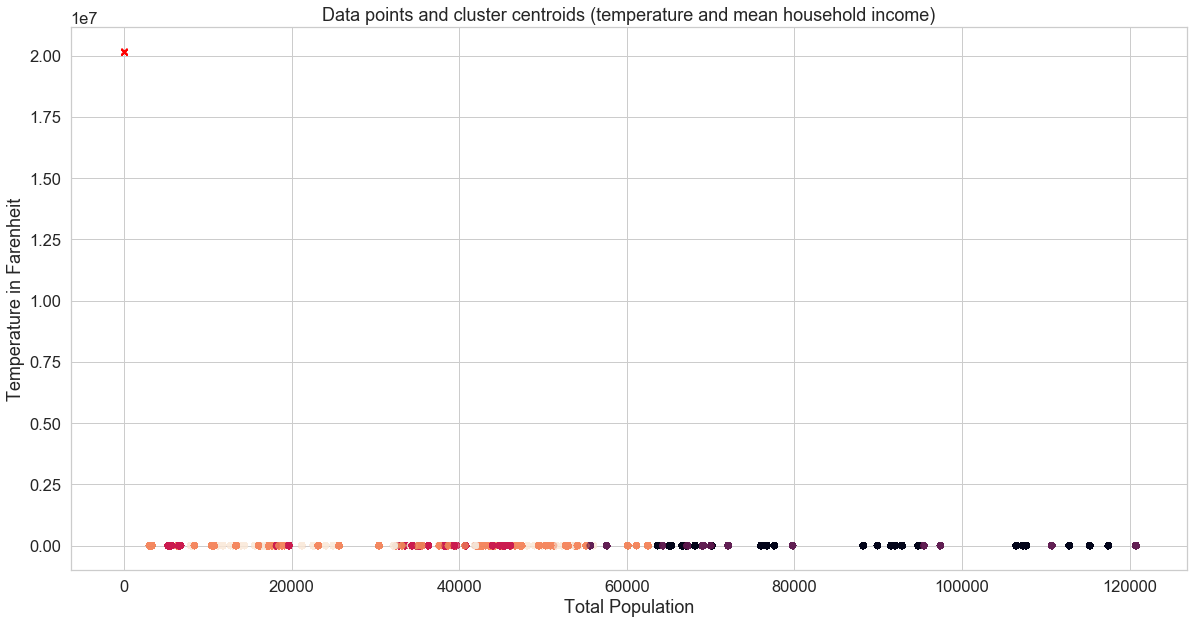

In [167]:
# Plotting the reverse of the plot above
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 2], new_df.iloc[:, 0], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 0],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.ylabel('Temperature in Farenheit')
plt.xlabel('Total Population');

**Takeaways:**

The second set of clusters looks very similar to the first and really does not provide us with any helpful information. Moving on to the next set of graphs.


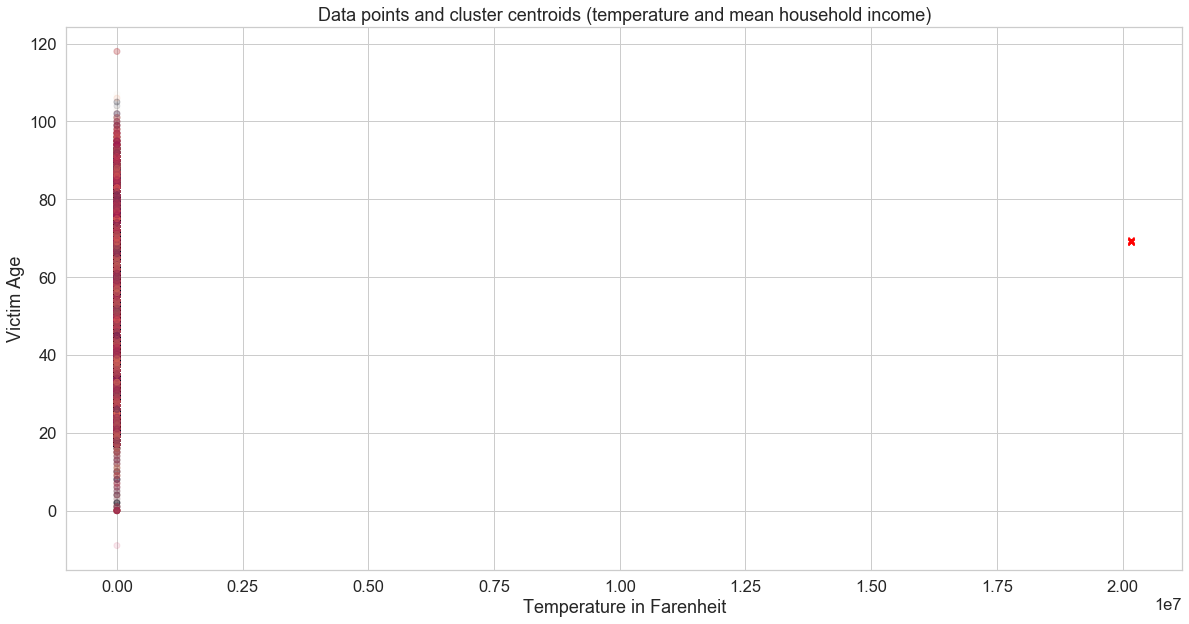

In [168]:
# Plotting cluster centers and the data points on a 2d plane (looking at temperature and victim age)
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 0], new_df.iloc[:, 1], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Victim Age');

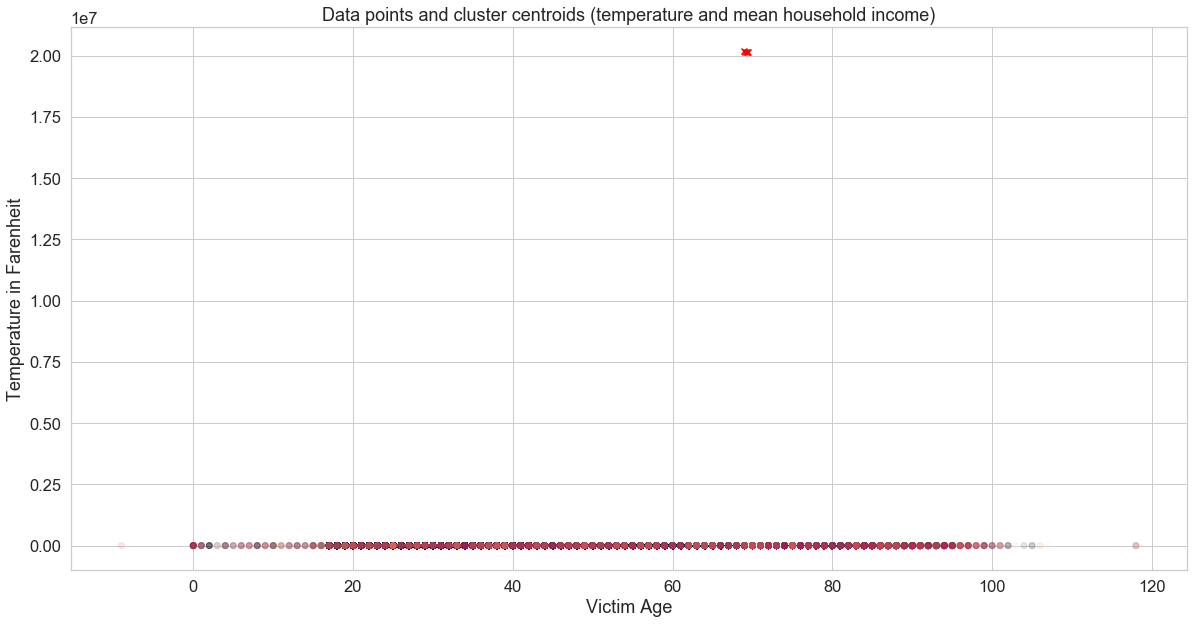

In [169]:
# Plotting the reverse of the plot above
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 1], new_df.iloc[:, 0], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 0],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.ylabel('Temperature in Farenheit')
plt.xlabel('Victim Age');

**Takeaways:**

Yep. Still more of the same, but it is interesting to note how far off the X's marking the centers of our clusters are in relation to our data dots. Weird. MORE CLUSTERING!!


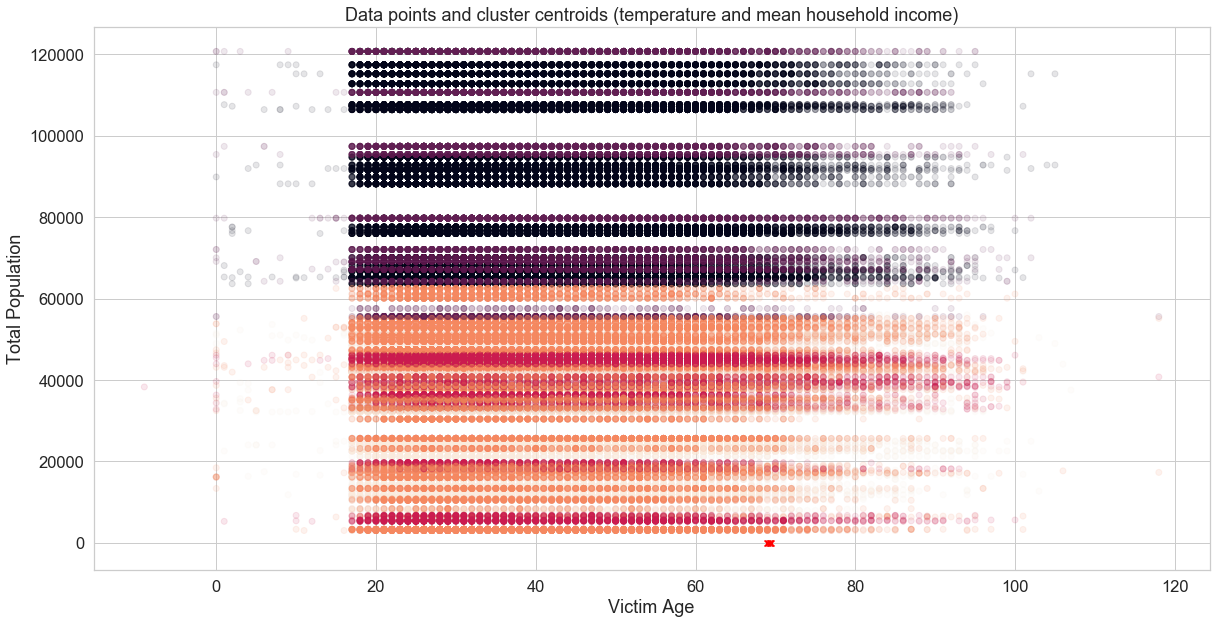

In [170]:
# Plotting cluster centers and the data points on a 2d plane (looking at victim age and total population)
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 1], new_df.iloc[:, 2], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 2],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.xlabel('Victim Age')
plt.ylabel('Total Population');

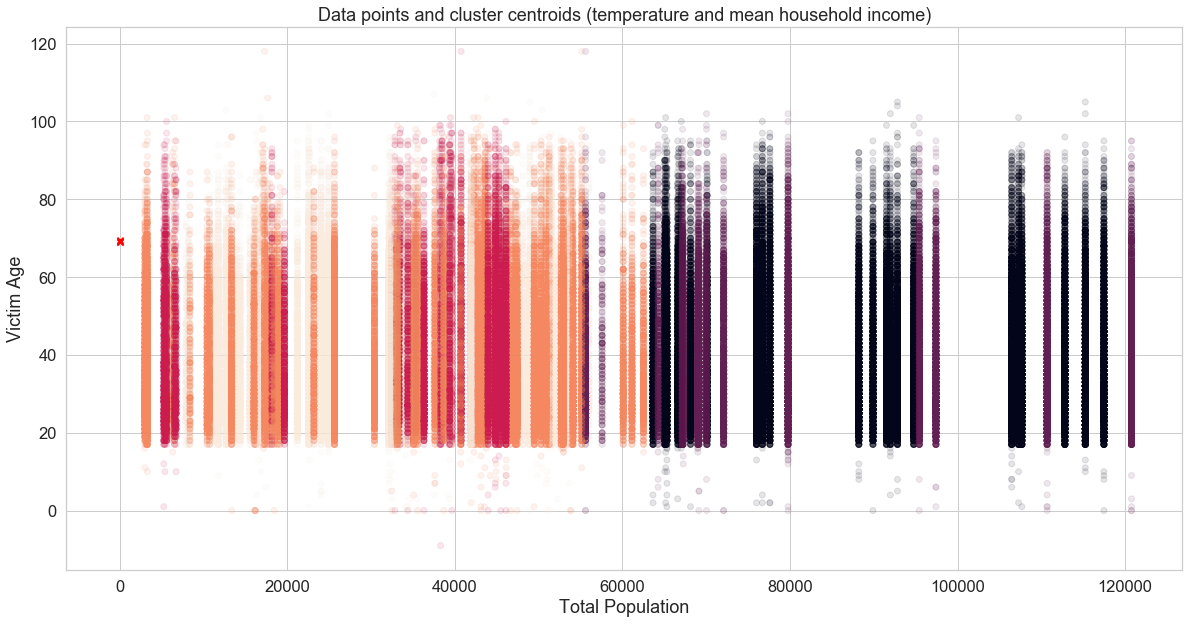

In [171]:
# Plotting the inverse of the graph above
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 2], new_df.iloc[:, 1], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 1],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.ylabel('Victim Age')
plt.xlabel('Total Population');

**Takeaways:**

Now we're actually seeing some sort of clusters/patterns! We can tell that victim ages below 20 and above 90-ish are pretty rare, no matter how much the total population is. We can also see that, based on the amount of colors and concentrations of points, that populations between 3,000 and 6,000 seem to have the largest group of victims at an older age. I have to wonder if this has anything to do with the average age of inhabitants and/or larger numbers of older citizens in these population groups! Either way, this tells us a bit of information, but doesn't really relate to our end goal of predicting crime report counts. Moving on to the next charts!


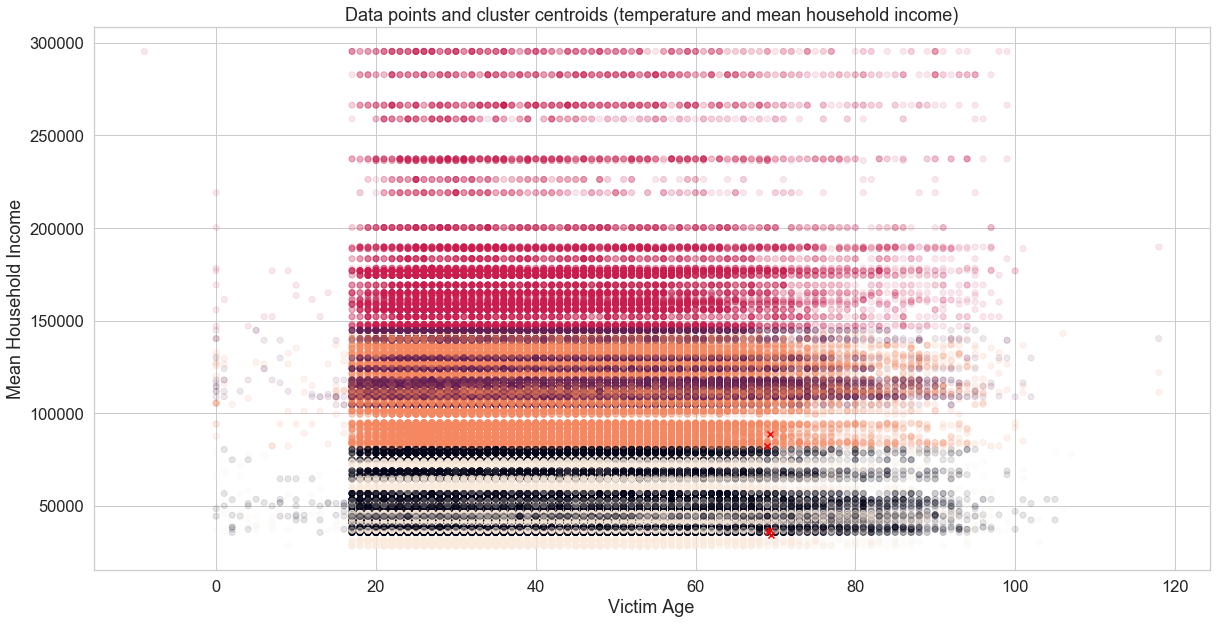

In [172]:
# Plotting cluster centers and the data points on a 2d plane (looking at victim age and mean household income)
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 1], new_df.iloc[:, 3], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:, 3],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.xlabel('Victim Age')
plt.ylabel('Mean Household Income');

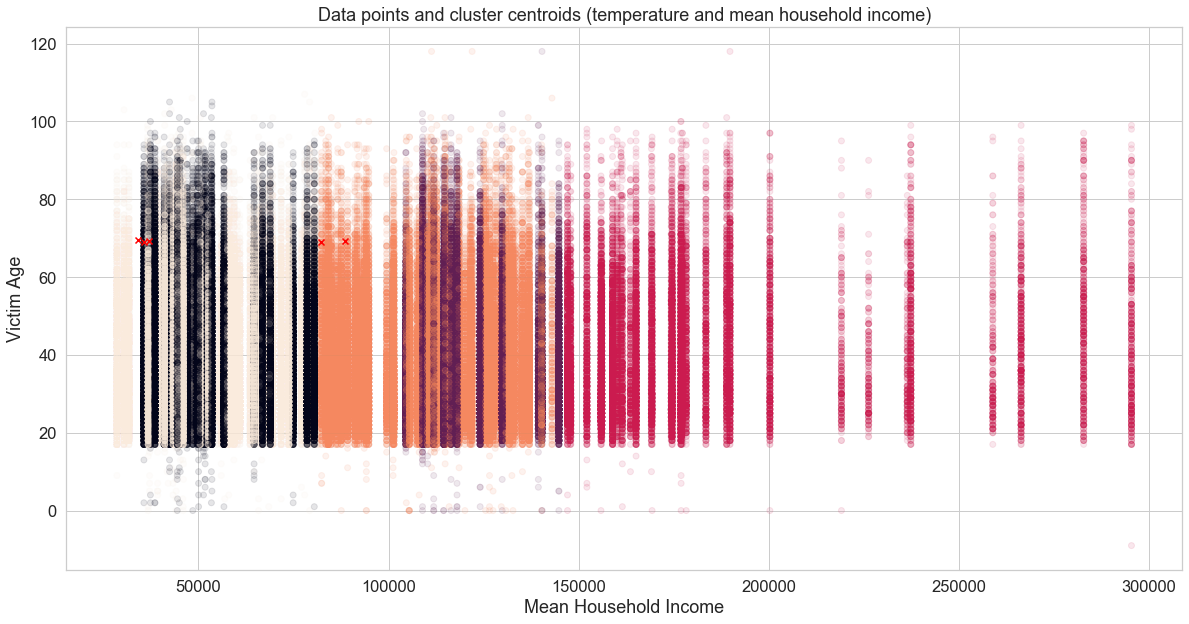

In [173]:
# Plotting the inverse of the graph above
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 3], new_df.iloc[:, 1], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 3],kmeans.cluster_centers_[:, 1],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.ylabel('Victim Age')
plt.xlabel('Mean Household Income');

**Takeaways:**

We have a bit more information here, but, once again it doesn't really help our end goal. What we can see here is that there are less crimes in households with higher mean incomes, households between 100,000 to 150,000 have a pretty solid age range in which victims occur in (20-60) and that households on the lower end of the income scale have a MUCH wider distribution of victim ages. Still, this info is interesting, but doesn't really drive our research question.


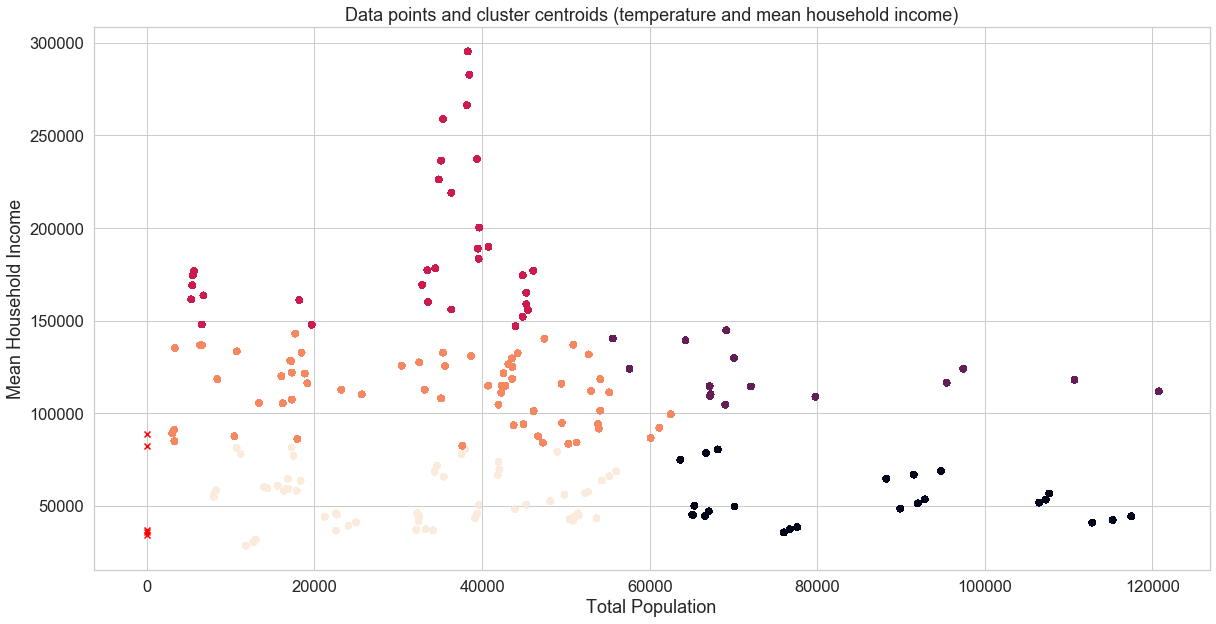

In [174]:
# Plotting cluster centers and the data points on a 2d plane (looking at total population and mean household income)
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 2], new_df.iloc[:, 3], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 2],kmeans.cluster_centers_[:, 3],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.xlabel('Total Population')
plt.ylabel('Mean Household Income');

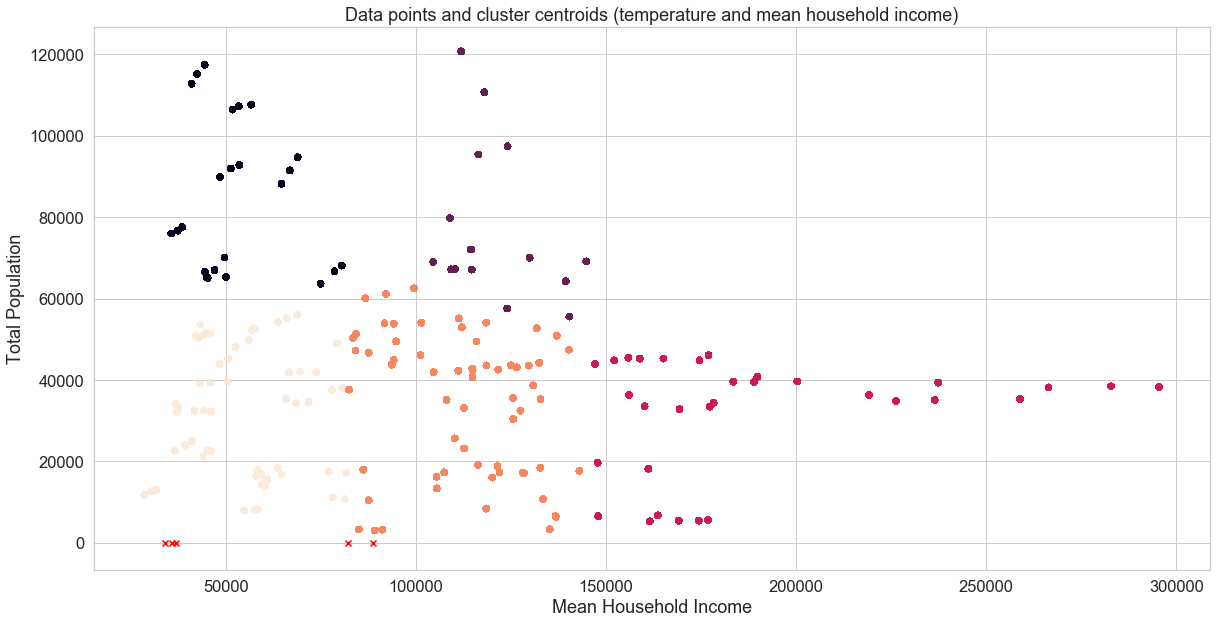

In [175]:
# plotting the inverse of the graph above
plt.figure(figsize = (20,10))
plt.scatter(new_df.iloc[:, 3], new_df.iloc[:, 2], c= kmeans.labels_, alpha= .1)

plt.scatter(kmeans.cluster_centers_[:, 3],kmeans.cluster_centers_[:, 2],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (temperature and mean household income)')
plt.ylabel('Total Population')
plt.xlabel('Mean Household Income');

**Takeaways:**

Here we can see that areas with total populations around 40,000 seem to have higher mean household incomes, but this is largely explained by the fact that this is a pretty average population for areas in Dallas city limits. Let's see if we can use the same variables we will later use in our time series analysis to try a bit more clustering.


### 3.2: Clustering Our Time Series "Kept" Variables
[Return to Outline](#Project-Outline:-Unsupervised-Learning)

In [176]:
# Trying to cluster the four variables we keep for time series analysis (month, day of the year, temp in F, and daily crime count)

# Creating daily crime count
crime_count = pd.DataFrame(df['date_only'].value_counts())

In [177]:
# Cleaning up our new crime count dataframe
crime_count.reset_index(inplace = True)
crime_count.rename(columns = {'index':'date_only', 'date_only':'daily_crime_count'}, inplace = True)
crime_count.sort_values(by= 'date_only', inplace = True)

In [178]:
# Merging two df together
df= pd.merge(df,crime_count, how= 'left', on = 'date_only')

In [179]:
# Sanity check: did our merging work out correctly?
df.head()

,date_only,month,mnth_yr,day1_of_the_week,time_of_occurrence,day_of_the_year,temp_in_F,humidity,percip_inches,911_call_type,type_of_incident,division,sector,council_district,victim_type,victim_race,victim_ethnicity,victim_gender,victim_age,responding_officer_#1__badge_no,responding_officer_#1__name,responding_officer_#2_badge_no,responding_officer_#2__name,x_coordinate,y_cordinate,zip_code,total_pop,male,%_male,female,%_female,median_age,18_&_over,21_&_over,62_&_over,65_&_over,%_white,%_black,%_native,%_asian,%_hispanic,pop_over_16,%_pop_over_16,%_employed,%_unemployed,mean_household_income,%_families_poverty,%_all_people_poverty,year,daily_crime_count
0,2015-01-01,1,January-2015,Thu,17:00,1,34.35,89.47,0.03,11V - BURG MOTOR VEH,BMV,SOUTH CENTRAL,730.0,D8,Individual,White,Non-Hispanic or Latino,Male,50,8173,"JONES,REGINALD,LADUNNE",NaN,NaN,2.51e+06,6.93e+06,75241,50872.0,23984.0,45.6,26888.0,54.4,34.0,71.8,68.1,14.1,12.0,21.1,74.7,11.5,0.0,20.3,3777.1,3777.1,48.9,6.3,42029.6,27.8,30.6,2015,227
1,2015-01-01,1,January-2015,Thu,00:20,1,34.35,89.47,0.03,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,SOUTH CENTRAL,710.0,D4,Individual,Black,Non-Hispanic or Latino,Male,51,8133,"ADAMS,CORY,JAMES",NaN,NaN,2.49e+06,6.95e+06,75216,76015.0,35922.0,46.6,40093.0,53.4,35.2,71.9,67.9,16.3,13.4,29.9,65.0,3.1,0.1,32.8,3142.2,3142.2,45.7,6.6,35651.2,34.2,38.6,2015,227
2,2015-01-01,1,January-2015,Thu,08:00,1,34.35,89.47,0.03,58 - ROUTINE INVESTIGATION,FRAUD USE/POSS IDENTIFYING INFO-PRELIMINARY IN...,CENTRAL,150.0,D2,Individual,Black,Non-Hispanic or Latino,Female,64,7341,"FREEMAN,DIANA,J",NaN,NaN,2.49e+06,6.97e+06,75215,22570.0,11298.0,48.8,11272.0,51.2,38.8,79.2,76.1,16.2,12.8,22.7,73.6,3.1,0.7,17.0,2085.6,2085.6,44.9,6.5,36629.8,30.3,37.2,2015,227
3,2015-01-01,1,January-2015,Thu,02:00,1,34.35,89.47,0.03,40 - OTHER,ASSAULT -VERBAL THREAT,NORTHWEST,520.0,D6,Individual,Hispanic or Latino,Hispanic or Latino,Male,36,10767,"HOVIS,ALAN",5455,"AKON,FREDRICK,CHARLES",2.47e+06,7.00e+06,75220,69009.0,38379.0,53.0,30630.0,47.0,33.7,74.9,71.2,12.0,9.1,75.7,7.3,16.0,3.0,48.1,4477.7,4477.7,62.7,4.8,104542.2,17.9,19.8,2015,227
4,2015-01-01,1,January-2015,Thu,13:00,1,34.35,89.47,0.03,31 - CRIMINAL MISCHIEF,CRIM MISCHIEF > OR EQUAL $50 BUT < $500,NORTHEAST,220.0,D9,Individual,Black,Non-Hispanic or Latino,Female,70,9654,"BANDAS,WAYI,ALIBEY",NaN,NaN,2.53e+06,6.99e+06,75228,106467.0,52189.0,49.1,54278.0,50.9,31.8,70.2,66.2,11.5,9.0,49.3,23.6,13.2,1.9,49.0,3865.9,3865.9,60.6,7.0,51758.2,22.6,24.5,2015,227


In [180]:
# How many records do we have now?
len(df)

254724

In [181]:
# Checking for nulls
df.isnull().sum().sort_values(ascending= False)

responding_officer_#2__name        169593
responding_officer_#2_badge_no     169593
council_district                      146
division                               11
sector                                 11
responding_officer_#1__name             0
responding_officer_#1__badge_no         0
victim_age                              0
victim_gender                           0
victim_ethnicity                        0
victim_race                             0
victim_type                             0
daily_crime_count                       0
year                                    0
type_of_incident                        0
911_call_type                           0
percip_inches                           0
humidity                                0
temp_in_F                               0
day_of_the_year                         0
time_of_occurrence                      0
day1_of_the_week                        0
mnth_yr                                 0
month                             

In [182]:
# We really don't care about the null values above so let's drop them
df.dropna(inplace = True)

In [183]:
# How many records do we now have?
len(df)

85066

In [184]:
# Creating our sub-df for just those variables we are keeping for TS analysis later
ts_df = df[['date_only', 'month', 'day_of_the_year', 'temp_in_F', 'daily_crime_count']]

In [185]:
ts_df.head()

,date_only,month,day_of_the_year,temp_in_F,daily_crime_count
3,2015-01-01,1,1,34.35,227
5,2015-01-01,1,1,34.35,227
6,2015-01-01,1,1,34.35,227
7,2015-01-01,1,1,34.35,227
14,2015-01-01,1,1,34.35,227


In [186]:
# Setting date as index
ts_df.set_index('date_only', drop = True, inplace = True)

In [187]:
ts_df.head()

,month,day_of_the_year,temp_in_F,daily_crime_count
date_only,,,,
2015-01-01,1,1,34.35,227
2015-01-01,1,1,34.35,227
2015-01-01,1,1,34.35,227
2015-01-01,1,1,34.35,227
2015-01-01,1,1,34.35,227


Now that we have a new sub-df of just the variables we will later use for our time series analysis let's go through and cluster these one by one in relation to our target variable: daily crime count!

In [188]:
# Setting up our kmeans model for clustering (for new ts subset)
kmeans_ts = KMeans(n_clusters = 5, random_state = 0).fit(ts_df)

In [189]:
# Getting cluster centroids
print('The centers of our clusters are: ', kmeans_ts.cluster_centers_)

# Getting cluster labels
print('The labels of our clusters are: ', kmeans_ts.labels_)

The centers of our clusters are:  [[ 11.2613382  329.25986571  56.06534302 180.29697255]
 [  1.77389248  37.27603401  51.65142485 162.41622451]
 [  6.71387475 187.47289223  86.4039636  186.58480859]
 [  8.99212966 258.32419985  79.6763971  186.2413572 ]
 [  4.225546   113.69598048  70.52981936 174.3169145 ]]
The labels of our clusters are:  [1 1 1 ... 0 0 0]


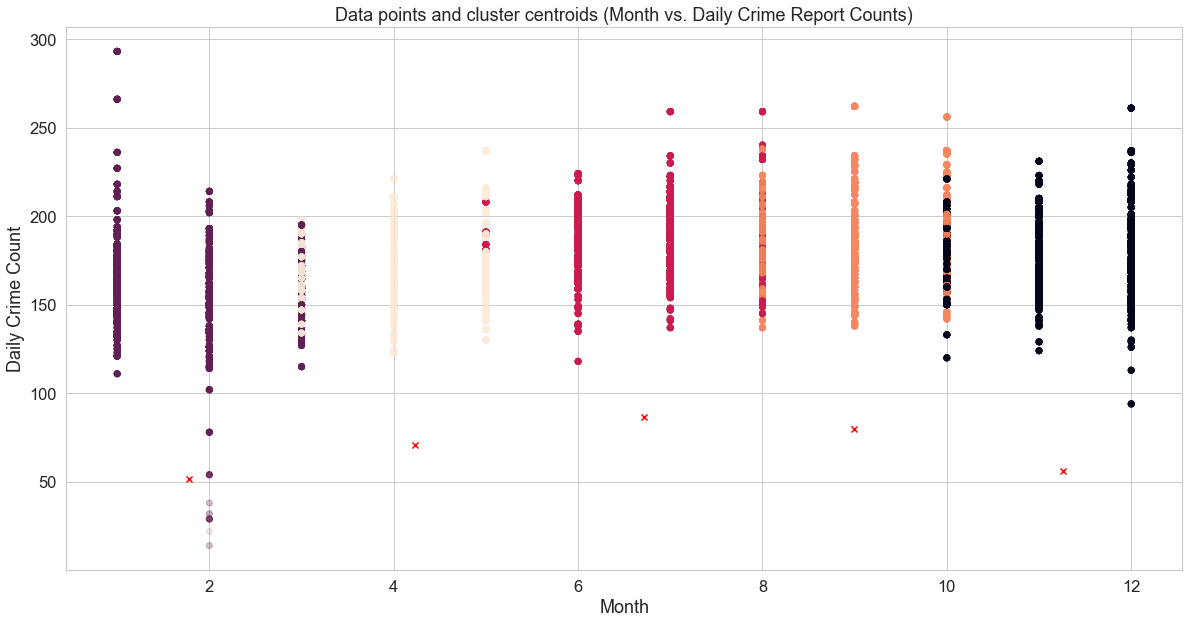

In [190]:
# Plotting cluster centers and the data points on a 2d plane (looking at month vs. daily crime count)
plt.figure(figsize = (20,10))
plt.scatter(ts_df.iloc[:, 0], ts_df.iloc[:, 3], c= kmeans_ts.labels_, alpha= .1)

plt.scatter(kmeans_ts.cluster_centers_[:, 0],kmeans_ts.cluster_centers_[:, 2],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (Month vs. Daily Crime Report Counts)')
plt.xlabel('Month')
plt.ylabel('Daily Crime Count');

**Takeaways:**

This chart is very similar to the linear clusters above and really doesn't tell us much. Let's move on to year vs. daily crime count.

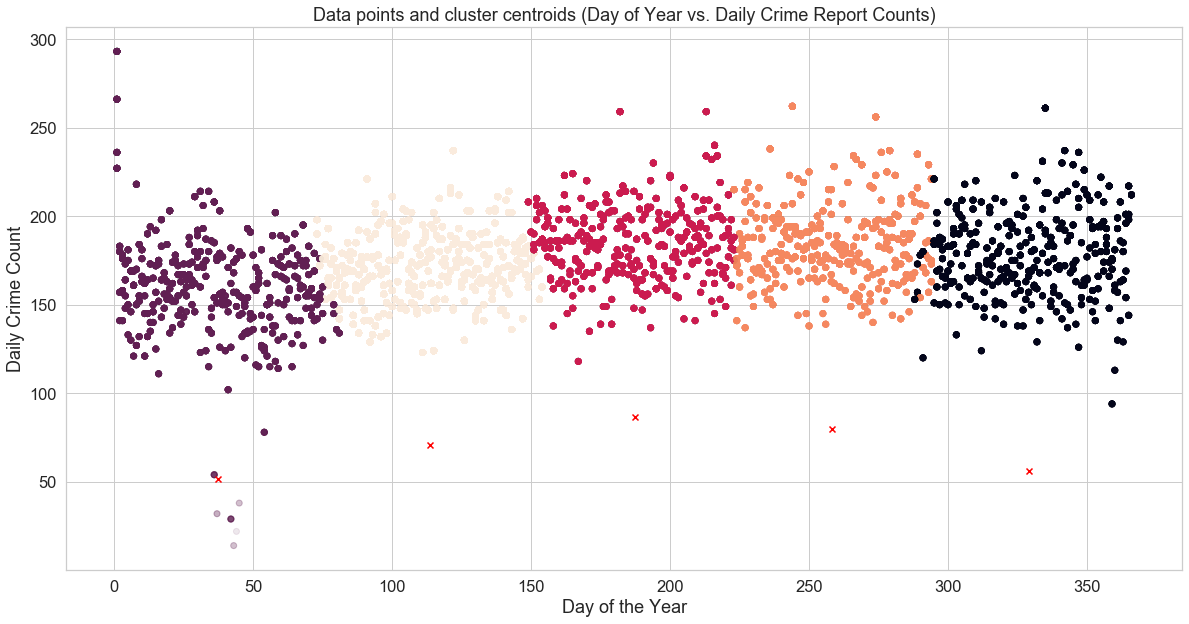

In [191]:
# Plotting cluster centers and the data points on a 2d plane (looking at day of year vs. daily crime count)
plt.figure(figsize = (20,10))
plt.scatter(ts_df.iloc[:, 1], ts_df.iloc[:, 3], c= kmeans_ts.labels_, alpha= .1)

plt.scatter(kmeans_ts.cluster_centers_[:, 1],kmeans_ts.cluster_centers_[:, 2],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (Day of Year vs. Daily Crime Report Counts)')
plt.xlabel('Day of the Year')
plt.ylabel('Daily Crime Count');

**Takeaways:**

WOW! These actually look like clusters we are used to in unsupervised learning! This is great, but we have one small problem: our X's (which signify the centers of our clusters) are way below the visable centers of our clusters! What's up with that??

Instead of focusing on what is crazy (and not really working here) let's focus on what we can tell from our visualization:
- Our "Day of the Year' has very defined and easy to see clusters representing how many crimes occurred on that day of the year (ie. day 362)
- We have several outliers on our first day of the year, like we visualized in our EDA section earlier.
- This info is cool to look at, but it really doesn't tell us anything our visualizations in the EDA section of our project did't already!

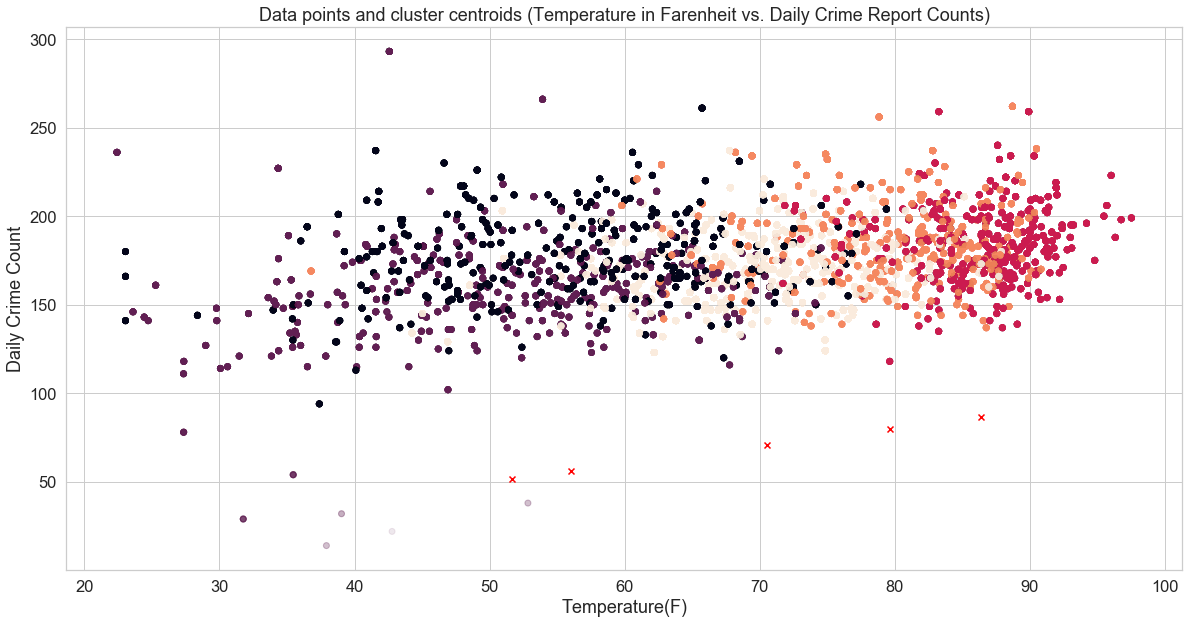

In [192]:
# Plotting cluster centers and the data points on a 2d plane (looking at temperature vs. daily crime count)
plt.figure(figsize = (20,10))
plt.scatter(ts_df.iloc[:, 2], ts_df.iloc[:, 3], c= kmeans_ts.labels_, alpha= .1)

plt.scatter(kmeans_ts.cluster_centers_[:, 2],kmeans_ts.cluster_centers_[:, 2],c = 'red', marker = 'x')

plt.title('Data points and cluster centroids (Temperature in Farenheit vs. Daily Crime Report Counts)')
plt.xlabel('Temperature(F)')
plt.ylabel('Daily Crime Count');

**Takeaways:**

This is a messy and confusing visualization which, to me, reminds me of an Everything Bagel more than data we are using to tell a story. We really can't use these clusters to gain anymore insight into our relationships/patterns in our data, sadly!

## 4. Final Thoughts on Clustering in This Project
[Return to Outline](#Project-Outline:-Unsupervised-Learning)

In machine learning clustering is an excellent tool when you have unlabeled data and/or you want to look at overall trends and patterns (example: looking at customer raw data in clusters to see if there is some way to gropu/sort your customers to improve reach and impact). This is great for projects where unlabeled data and looking for patterns is important. Our current project is not one of these. 

By completing the above clustering we gained little extra insights into our data and it's underlying patterns. Most of the connections we already observed during our inital EDA for each of our three datasets. Clustering our labeled data (all of our data is, by default, labeled since we know all of these individual records are crime reports (and our target variable is a aggregation of this)) was an additional step that was a project requirement, but one that provided little positive influence on our overall understanding of the data. If this was a project for a company and I was the lead data scientist I would completely skip the clustering as I feel it was a waste of valuable time and resources. 

With that said, let's move on to the next phase of our project: time series analysis!


Want to know what I did with this data? Check out the project page [here](https://steelealloy.github.io/final_capstone/)